1. Is the website redesign any good?

H0 - The website redesign click rate did not increase.
Ha - The website redesign click rate increased.

True Negative - the evidence supports the click rate did not increase.

False Negative - the click rate did no increase but there was not enough to prove the negative was due to redesign.

False Positive - the click rate did increase but there was not enough to prove the positive was due to redesign .

True Positive - the evidence supports the click rate decreased.

2. Is our television ad driving sales?

H0 - Sales did not increase due to the ad.
Ha - Sales increased due to the ad

True Negative - The evidence shows the ad did not help sales.
False Negative - Sales did not increase but it may not be because of the ad.
False Positive - Sales increased but it may not be because of the ad.
True Positive - Sales increased and were proven to be related to the ad.

3. Has the network latency gone up since we switched internet service providers?

H0 - Network latency has not gone up since we switched services.

Ha - Network latency has gone up since we switched services

True Negative - Evidence shows no chance in latency
False Negative - no chance in latency, but evidence suggests it be affected by 
False Positive - Latency has gone up, but not strong evidence it is due to service change.
True Positive - Latency has gone up and it is very likely due to service chance.

In [23]:
# Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.
from math import sqrt
from scipy import stats
n1 = 40
n2 = 50

s1 = 15
s2 = 20

m1 = 90
m2 = 100

degf = n1 + n2 - 2

s_p = sqrt((((n1-1) * s1**2) + ((n2-1) * s2**2))/(n1+n2-2))

standard_error = se = sqrt(s1**2 / n1 + s2**2/n2)
t = (m1-m2) /(s_p * sqrt(1/n1+1/n2))
t

-2.6252287036468456

In [4]:
from math import sqrt
from scipy import stats

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#import viz # curriculum visualization examples

#stats.t(degf).sf(t)*2

In [436]:
from pydataset import data

In [34]:
mpg = data('mpg')
mpg.head(2)
mpg['mpg'] = (mpg['cty'] + mpg['hwy']) / 2
mpg.head(2)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0


In [42]:
mpg_by_year = mpg[['year','mpg']].groupby('year').mean()
mpg_by_year

,mpg
year,
1999,20.222222
2008,20.076923


In [49]:
mpg['type_compact'] = mpg['class'].str.contains('compact')
mpg_by_type = mpg[['type_compact','mpg']].groupby('type_compact').mean()
mpg_by_type

,mpg
type_compact,
False,17.947368
True,24.231707


In [50]:
mpg['manual_trans'] = mpg['trans'].str.contains('auto')
mpg_by_trans = mpg[['manual_trans','mpg']].groupby('manual_trans').mean()
mpg_by_trans

,mpg
manual_trans,
False,22.227273
True,19.130573


In [54]:
# Do VW get better highway mpg than average?

vw_highway_mpg = mpg[mpg.manufacturer == 'volkswagen'].hwy
vw_highway_mpg

stats.ttest_1samp(vw_highway_mpg,mpg.hwy.mean())

Ttest_1sampResult(statistic=5.652041311757083, pvalue=6.068818710469792e-06)

In [57]:
compact_mpg = mpg[mpg['class'] == 'compact'].cty

In [58]:
mid_mpg = mpg[mpg['class'] == 'midsize'].cty

In [59]:
stats.ttest_ind(mid_mpg,compact_mpg)

Ttest_indResult(statistic=-2.2845195147123536, pvalue=0.024803276085898066)

In [62]:
(274_136 + 977_643)/330_284_744

0.003789999455742346

In [65]:
mpg_hwy = mpg.hwy
mpg_cty = mpg.cty
mpg.head(1)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,mpg,type,type_compact,manual_trans
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,True,True,True


In [64]:
stats.pearsonr(mpg_hwy,mpg_cty)

(0.9559159136495721, 1.8683071952629614e-125)

Is there a linear relationship between engine disp and cty?

Ho - there is no relationship between disp and cty
Ha - there is a relationship between disp and cty

mpg_disp = mpg.displ

In [67]:
mpg_disp = mpg.displ
stats.pearsonr(mpg_cty,mpg_disp)

(-0.7985239689348551, 4.737914890205637e-53)

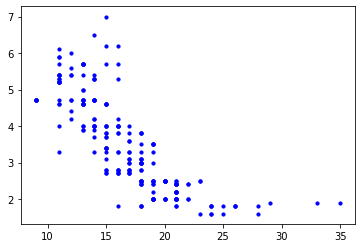

In [69]:
plt.scatter(mpg_cty,mpg_disp,s=10,c='blue')

In [124]:
import env
def get_db_url():
    user = env.user
    password = env.password
    host = env.host
    database = input("Database: ")
    url = f'mysql+pymysql://{user}:{password}@{host}/{database}'
    return url

In [125]:
url = get_db_url()

Database: telco_churn


In [209]:
customers = pd.read_sql('''SELECT * FROM customers''',url)

In [212]:
customers = customers[customers['monthly_charges'].notnull()]

In [254]:
customers['monthly_charges','total_charges'] = customers['monthly_charges','total_charges'].astype(float)

x = customers['monthly_charges']
y = customers['tenure']

stats.pearsonr(x,y)

(0.2468617666408935, 3.9898213232673846e-98)

In [256]:
customers = customers[customers['total_charges'].notnull()]
#customers['total_charges'] = customers['total_charges'].astype(float)
x = customers['total_charges']
y = customers['tenure']
customers['total_charges'] = customers['total_charges'].convert_objects(convert_numeric=True)
#stats.pearsonr(x,y)
customers['total_charges'].sort_values()
stats.pearsonr(x,y)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """


(0.825880460933202, 0.0)

In [205]:
n = customers.shape[0]
degf = n-2
conf_interval = .95
alpha = 1-conf_interval

(0.052134674964232956, 1.2006106325920756e-05)

In [181]:
stringy = """    Company name
    leader: Claire
    cashier: Ole"""
def role(name):
    slice = stringy.partition(name)[0]
    role_str = slice.split(' ')[-2]
    return role_str

In [185]:
role('Ole')
from csv import reader
import pandas as pd
import scipy.stats as stats

In [190]:
df = pd.read_csv('kickstarter.csv')
df = df[df.status.isin(['failed','successful'])]
df['success'] = df.status == 'successfull'

In [192]:
pd.crosstab(df.status,df.category)

category,Art,Comics,Dance,Design,Fashion,Film & Video,Film &amp; Video,Food,Games,Music,Photography,Publishing,Technology,Theater
status,,,,,,,,,,,,,,
failed,1585,448,180,837,684,210,5962,643,832,3261,742,2484,448,680
successful,2106,520,527,729,335,246,6177,655,635,6792,645,1671,289,1642


In [262]:
url = get_db_url()
import pandas as pd

Database: employees


In [401]:
employees2 = pd.read_sql(
    """SELECT * FROM employees

    """,url)


In [422]:
salaries2 = pd.read_sql('''SELECT * FROM salaries''',url)

In [423]:
salaries2

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10001,62102,1987-06-26,1988-06-25
2,10001,66074,1988-06-25,1989-06-25
3,10001,66596,1989-06-25,1990-06-25
4,10001,66961,1990-06-25,1991-06-25
5,10001,71046,1991-06-25,1992-06-24
6,10001,74333,1992-06-24,1993-06-24
7,10001,75286,1993-06-24,1994-06-24
8,10001,75994,1994-06-24,1995-06-24
9,10001,76884,1995-06-24,1996-06-23


In [428]:
num_promotions = salaries2.set_index(['emp_no','to_date']).count(level='emp_no')

In [434]:

emp_salary2

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary_x,max_date,date_diff,salary_y,from_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,88958,2019-10-07 21:55:35.128597,12156.0,17,17
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,72527,2019-10-07 21:55:35.128597,12373.0,6,6
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,43311,2019-10-07 21:55:35.128597,12093.0,7,7
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,74057,2019-10-07 21:55:35.128597,11998.0,16,16
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,94692,2019-10-07 21:55:35.128597,10982.0,13,13
5,10006,1953-04-20,Anneke,Preusig,F,1989-06-02,59755,2019-10-07 21:55:35.128597,11084.0,12,12
6,10007,1957-05-23,Tzvetan,Zielinski,F,1989-02-10,88070,2019-10-07 21:55:35.128597,11196.0,14,14
7,10008,1958-02-19,Saniya,Kalloufi,M,1994-09-15,52668,2000-07-31 00:00:00.000000,9153.0,3,3
8,10009,1952-04-19,Sumant,Peac,F,1985-02-18,94409,2019-10-07 21:55:35.128597,12649.0,18,18
9,10010,1963-06-01,Duangkaew,Piveteau,F,1989-08-24,80324,2019-10-07 21:55:35.128597,11001.0,6,6


In [435]:
#relationship between tenure and titles
x = emp_salary2['from_date']
y = emp_salary2['date_diff']
stats.pearsonr(x,y)

(0.5023706783194161, 0.0)

In [308]:
salaries = pd.read_sql(
    """
    SELECT s_max.emp_no, max(s_max.to_date) as max_date,s.salary 
    FROM salaries s
    INNER JOIN salaries s_max
    ON s_max.emp_no = s.emp_no
    GROUP BY s_max.emp_no
    """,url)


InternalError: (pymysql.err.InternalError) (1055, "Expression #3 of SELECT list is not in GROUP BY clause and contains nonaggregated column 'employees.s.salary' which is not functionally dependent on columns in GROUP BY clause; this is incompatible with sql_mode=only_full_group_by")
[SQL: 
    SELECT s_max.emp_no, max(s_max.to_date) as max_date,s.salary 
    FROM salaries s
    INNER JOIN salaries s_max
    ON s_max.emp_no = s.emp_no
    GROUP BY s_max.emp_no
    ]
(Background on this error at: http://sqlalche.me/e/2j85)

In [307]:
salaries
#salaries.groupby(['emp_no','salary'])['to_date'].max().head(10)

,emp_no,max_date
0,10001,9999-01-01
1,10002,9999-01-01
2,10003,9999-01-01
3,10004,9999-01-01
4,10005,9999-01-01
5,10006,9999-01-01
6,10007,9999-01-01
7,10008,2000-07-31
8,10009,9999-01-01
9,10010,9999-01-01


In [366]:
#employees = pd.merge(employees,salaries,on='emp_no')
emp_salary = pd.merge(employees,salaries,on='emp_no')
#emp_salary['new_date'] = np.where(emp_salary['max_date'] >pd.Timestamp('today'),pd.Timestamp('today'),emp_salary['max_date'])
#type(emp_salary['max_date'][0])
#emp_salary['new_date'] = np.where(emp_salary['max_date']>pd.datetime.now(),pd.datetime.now(),emp_salary['max_date'])
filler = pd.to_datetime('today')
emp_salary['max_date'] = pd.to_datetime(emp_salary['max_date'],errors='coerce').fillna(filler)
#emp_salary['date_diff'] = emp_salary['max_date'] - emp_salary['hire_date']
emp_salary

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,max_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,88958,2019-10-07 21:55:35.128597
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,72527,2019-10-07 21:55:35.128597
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,43311,2019-10-07 21:55:35.128597
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,74057,2019-10-07 21:55:35.128597
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,94692,2019-10-07 21:55:35.128597
5,10006,1953-04-20,Anneke,Preusig,F,1989-06-02,59755,2019-10-07 21:55:35.128597
6,10007,1957-05-23,Tzvetan,Zielinski,F,1989-02-10,88070,2019-10-07 21:55:35.128597
7,10008,1958-02-19,Saniya,Kalloufi,M,1994-09-15,52668,2000-07-31 00:00:00.000000
8,10009,1952-04-19,Sumant,Peac,F,1985-02-18,94409,2019-10-07 21:55:35.128597
9,10010,1963-06-01,Duangkaew,Piveteau,F,1989-08-24,80324,2019-10-07 21:55:35.128597


In [380]:
emp_salary['date_diff'] = pd.datetime.now().date() - emp_salary['hire_date']

In [395]:
#emp_salary['date_diff'] = emp_salary['date_diff']/pd.to_timedelta(1,unit='D')
#relationship between employees and salaries
x = emp_salary['date_diff']
y = emp_salary['salary']
stats.pearsonr(x,y)

(0.268809631984003, 0.0)

In [451]:
employees_positions = pd.read_sql("""SELECT emp_no,to_date FROM employees""",url)

employees_positions

InternalError: (pymysql.err.InternalError) (1054, "Unknown column 'to_date' in 'field list'")
[SQL: SELECT emp_no,to_date FROM employees]
(Background on this error at: http://sqlalche.me/e/2j85)

In [316]:
salaries = pd.read_sql("""
SELECT s.emp_no, s.salary,max_date
FROM salaries s 
INNER JOIN (SELECT emp_no, max(to_date) as max_date 
FROM salaries 
GROUP BY emp_no)a on a.emp_no = s.emp_no and a.max_date = s.to_date
""",url)

In [441]:
emp_salary = pd.merge(employees,salaries,on='emp_no',how='inner')

In [437]:
sleepstudy = data('sleepstudy')

In [440]:
#3 Use the sleepstudy data. Is there a relationship between days and reaction time?

sleepstudy
x = sleepstudy['Reaction']
y = sleepstudy['Days']
stats.pearsonr(x,y)

(0.5352302262650253, 9.894096322214812e-15)

In [503]:
#1 Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.
index = ['Codeup Student','Not Codeup Student']
columns = ['Macbook','Other']
observed= pd.DataFrame([[49,20],[1,30]], index=index, columns=columns)
chi2,p,degf,expected = stats.chi2_contingency(observed)
chi2
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,mpg,type,type_compact,manual_trans,class_truck
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,True,True,True,False
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,True,True,False,False
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,True,True,False,False
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,True,True,True,False
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,True,True,True,False
6,audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact,22.0,True,True,False,False
7,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact,22.5,True,True,True,False
8,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact,22.0,True,True,False,False
9,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact,20.5,True,True,True,False
10,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact,24.0,True,True,False,False


In [518]:
#2. Choose another 2 categorical variables from the mpg dataset and perform a 
#chi2 contingency table test with them. 
#Be sure to state your null and alternative hypotheses.

#mpg['class_truck'] = mpg['class'] == 'pickup'
#mpg
columns = ['Other','Truck']
index = ['Manual','Auto']
observed = pd.DataFrame([[64,13],[137,20]],index=index,columns=columns)
chi2,p,degf,expected = stats.chi2_contingency(observed)
chi2
expected

array([[ 66.14102564,  10.85897436],
       [134.85897436,  22.14102564]])

In [519]:
observed2 = pd.crosstab(mpg.manual_trans,mpg.class_truck)

In [506]:
chi2,p,degf,expected = stats.chi2_contingency(observed)

In [550]:
import datetime

In [520]:
stats.chi2_contingency(observed2)

(0.43030652466392083,
 0.5118385795943732,
 1,
 array([[ 66.14102564,  10.85897436],
        [134.85897436,  22.14102564]]))

In [522]:
emp_titles = pd.read_sql("""
SELECT t.emp_no, t.title,max_date
FROM titles t
INNER JOIN (SELECT emp_no, max(to_date) as max_date 
FROM titles 
GROUP BY emp_no)a on a.emp_no = t.emp_no and a.max_date = t.to_date
""",url)

In [524]:
employee_w_titles = pd.merge(employees,emp_titles,on='emp_no')

In [5]:
department = pd.read_sql("""
SELECT emp_no,dept_name
FROM employees_with_departments
WHERE dept_name IN ('Sales','Marketing')
""",url)

NameError: name 'url' is not defined

In [530]:
emp_dept_title = pd.merge(employee_w_titles,department,on='emp_no',how='outer')

In [2]:
employees = pd.read_sql("""
SELECT emp_no, gender
FROM employees""",url)

NameError: name 'pd' is not defined

In [ ]:
dept_emp = pd.read_sql("""
SELECT de.emp_no,de.dept_no,de.to_date,a.dept_name
FROM dept_emp de

JOIN (SELECT emp_no, dept_name,dept_no
FROM employees_with_departments) a 
on a.emp_no = de.emp_no and a.dept_no = de.dept_no

WHERE de.to_date = '9999-01-01'""",url)

In [ ]:
titles = pd.read_sql("""
SELECT emp_no,title
FROM titles
WHERE to_date = '9999-01-01'""",url)

In [ ]:
departments = pd.read_sql("""
SELECT emp_no,dept_name,dept_no
FROM employees_with_departments

""",url)

In [1]:
department_emp = pd.merge(dept_emp,employees,on='emp_no',how='inner')

NameError: name 'pd' is not defined

In [ ]:
sales_marketing = department_emp[(department_emp['dept_name'].isin(['Sales','Marketing']))]

In [ ]:
observed = pd.crosstab(sales_marketing.gender,sales_marketing.dept_name)

In [ ]:
title_emp = pd.merge(titles,employees,on='emp_no',how='inner')

In [ ]:
title_emp['manager'] = title_emp.title == 'Manager'

In [ ]:
observed = pd.crosstab(title_emp.manager,title_emp.gender)